# Projeto: Ligações para o 911

Para este projeto estaremos analisando alguns dados de chamadas para o 911 do [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Os dados contém os seguintes campos:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)

Simplesmente acompanhe este notebook e tente completar as instruções ou responder as perguntas em negrito usando suas habilidades Python e Data Science!

## Dados e Configuração

** Importar numpy e pandas **

In [1]:
import pandas as pd
import numpy as np

** Importe as bibliotecas de visualização e configure% matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Leia o arquivo csv como um dataframe chamado df **

In [3]:
df = pd.read_csv("911.csv")

** Verifique a info() do df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Verifique o cabeçalho do df **

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Perguntas básicas

** Quais são os top 5 CEPs nas chamadas 911? **

In [6]:
def frequent_zip_numbers(n=None):
    """
    sorts and returns the most frequent zip numbers from 911's calls
    """
    return df["zip"].value_counts().head(n)

frequent_zip_numbers(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
def frequent_town(n=None):
    """
    sorts and returns the most frequent cities from 911's calls
    """
    return df['twp'].value_counts().head(n)
frequent_town(10)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: twp, dtype: int64

** Quais são os 5 principais municípios nas chamadas 911? **

In [8]:
def frequent_titles(n=None):
    """
    sorts and returns the most frequent code titles from 911's calls
    """
    return df['title'].value_counts().head(n)
frequent_titles(10)

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
EMS: FALL VICTIM                4863
EMS: VEHICLE ACCIDENT           3935
Traffic: ROAD OBSTRUCTION -     3144
EMS: SUBJECT IN PAIN            2687
EMS: HEAD INJURY                2631
Name: title, dtype: int64

** Identificando e realizando regragação do titulos de código **

In [59]:
reason=set([df['title'].unique()[x].split(':')[0] for x in range(df['title'].nunique())])

In [10]:
set([df['title'].unique()[x].split(':')[1].strip() for x in range(df['title'].nunique())])

{'ABDOMINAL PAINS',
 'ACTIVE SHOOTER',
 'ALLERGIC REACTION',
 'ALTERED MENTAL STATUS',
 'AMPUTATION',
 'ANIMAL BITE',
 'APPLIANCE FIRE',
 'ASSAULT VICTIM',
 'BACK PAINS/INJURY',
 'BOMB DEVICE FOUND',
 'BUILDING FIRE',
 'BURN VICTIM',
 'CARBON MONOXIDE DETECTOR',
 'CARDIAC ARREST',
 'CARDIAC EMERGENCY',
 'CHOKING',
 'CVA/STROKE',
 'DEBRIS/FLUIDS ON HIGHWAY',
 'DEBRIS/FLUIDS ON HIGHWAY -',
 'DEHYDRATION',
 'DIABETIC EMERGENCY',
 'DISABLED VEHICLE',
 'DISABLED VEHICLE -',
 'DIZZINESS',
 'DROWNING',
 'ELECTRICAL FIRE OUTSIDE',
 'ELECTROCUTION',
 'EMS SPECIAL SERVICE',
 'EYE INJURY',
 'FALL VICTIM',
 'FEVER',
 'FIRE ALARM',
 'FIRE INVESTIGATION',
 'FIRE POLICE NEEDED',
 'FIRE SPECIAL SERVICE',
 'FRACTURE',
 'GAS-ODOR/LEAK',
 'GENERAL WEAKNESS',
 'HAZARDOUS MATERIALS INCIDENT',
 'HAZARDOUS ROAD CONDITIONS -',
 'HEAD INJURY',
 'HEAT EXHAUSTION',
 'HEMORRHAGING',
 'INDUSTRIAL ACCIDENT',
 'LACERATIONS',
 'MATERNITY',
 'MEDICAL ALERT ALARM',
 'NAUSEA/VOMITING',
 'OVERDOSE',
 'PLANE CRASH',
 'POI

## Criando novos recursos

** Na coluna "title" existem "Razões / Departamentos" especificados antes do código do título. Estes são "EMS", "Fire" e "Traffic". Use .apply () com uma expressão lambda personalizada para criar uma nova coluna chamada "Razão" que contém esse valor de string. **

** Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seria EMS. **

In [11]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [12]:
df['Department'] = df['title'].apply(lambda x: x.split(':')[1])

In [13]:
def frequent_reason(n=3):
    """
    returns the count of the reasons from 911's calls
    """
    return df['Reason'].value_counts().head(n)
frequent_reason()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

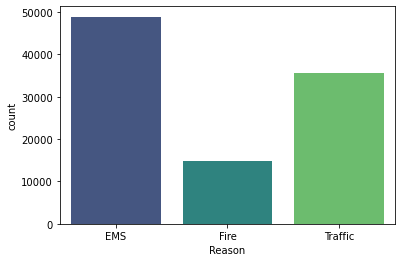

In [14]:
sns.countplot(x='Reason', data=df, palette='viridis')

** Agora vamos começar a focar em informações de tempo. Qual é o tipo de dados dos objetos na coluna timeStamp? **

In [15]:
type(df['timeStamp'].iloc[8])

str

** Você deveria ter notado que esses timestamps ainda são strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) para converter a coluna de strings em objetos DateTime. **

In [16]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** Agora você pode pegar atributos específicos de um objeto Datetime chamando-os. Por exemplo:**

    time = df['timeStamp'].iloc[0]
    time.hour

** Você pode usar o método de consulta de funções do Jupyter (Tab) para explorar os vários atributos que você pode chamar. Agora que a coluna timestamp é realmente objetos DateTime, use .apply () para criar 3 novas colunas chamadas Hour, Month e Day of Week. Você criará essas colunas com base na coluna timeStamp, consulte as soluções se você ficar preso nesta etapa. **

In [19]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.day_of_week)

** Observe como o dia da demana é um número inteiro de 0-6. Use o .map () com este dicionário para mapear os nomes das seqüências reais para o dia da semana: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

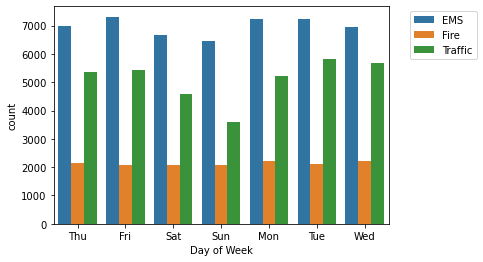

In [26]:
sns.countplot(x='Day of Week', hue='Reason', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

** Agora use Seaborn para criar um countplot da coluna "Day of Week" com a tonalidade baseada na coluna Reason. **

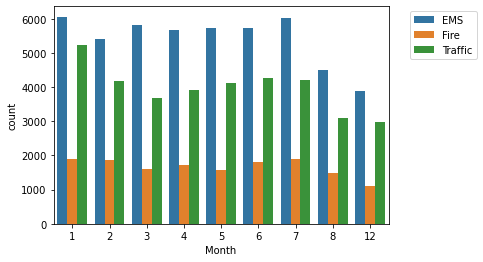

In [27]:
sns.countplot(x='Month', hue='Reason', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

** Você notou algo estranho no Plot? **

_____

** Você deve ter notado que estavam faltando alguns meses. Vejamos se podemos talvez preencher essa informação ao traçar as informações de outra forma, possivelmente um plot de linha simples que preencha os meses que faltam. Para fazer isso, precisamos trabalhar com pandas...

** Agora, crie um objeto groupby chamado "byMonth", onde você agrupa o DataFrame pela coluna do mês e use o método count() para agregação. Use o método head() neste DataFrame retornado. **

In [32]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Department,Hour,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


** Agora crie um plot simples fora do Dataframe indicando a contagem de chamadas por mês. **

<AxesSubplot:xlabel='Month'>

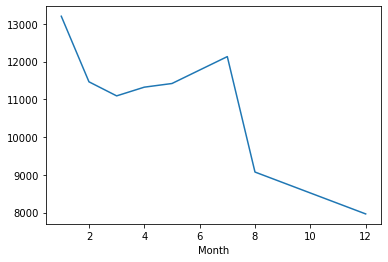

In [33]:
byMonth['twp'].plot()

** Agora veja se você pode usar o lmplot () do Seaborn para criar um modelo linear no número de chamadas por mês. Tenha em mente que talvez seja necessário resetar o índice em uma coluna. **

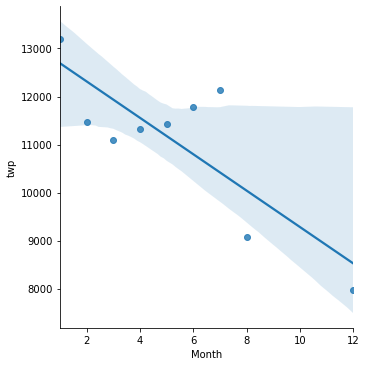

In [36]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

** Crie uma nova coluna chamada 'Data' que contenha a data da coluna timeStamp.**

In [46]:
df['Data'] = df['timeStamp'].apply(lambda x: x.date())

** Agora agrupe esta coluna Data com o groupby. Usando o count (), crie um gráfico de contagens de chamadas 911. **

In [47]:
data = df.groupby('Data').count()

** Agora recrie esse plot, mas crie 3 plots separados com cada plot representando uma Razão para a chamada 911 **

<AxesSubplot:xlabel='Data'>

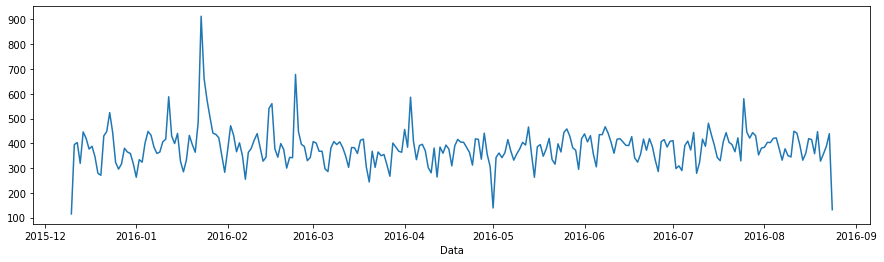

In [53]:
data['twp'].plot.line(figsize=(15,4))

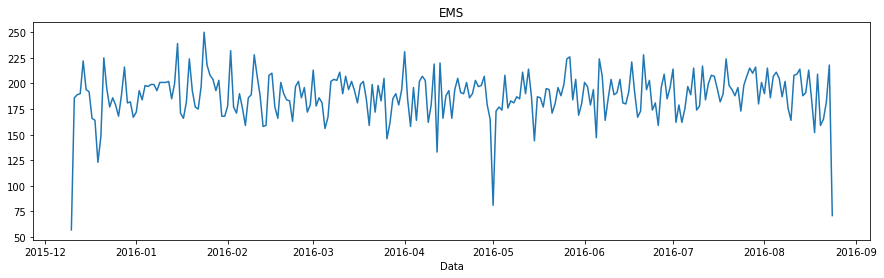

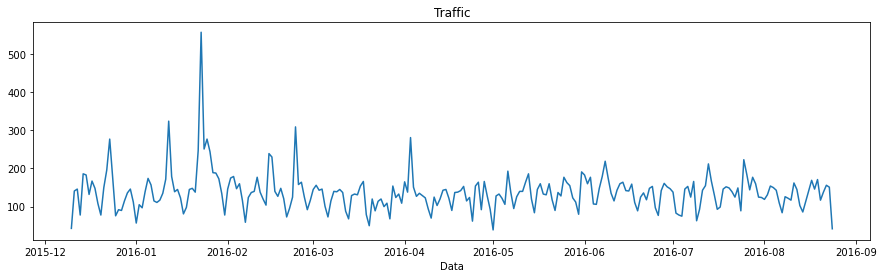

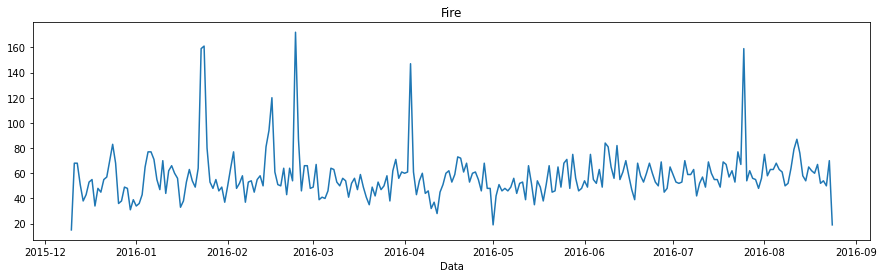

In [63]:
for w in reason:
    plt.figure()
    df[df['Reason'] == w].groupby('Data').count()['twp'].plot.line(figsize=(15,4))
    plt.title(w)

____
** Agora vamos continuar a criar mapas de calor com seaborn e nossos dados. Em primeiro lugar, devemos reestruturar o quadro de dados para que as colunas se tornem horas e o Índice se torne o Dia da Semana. Há muitas maneiras de fazer isso, mas eu recomendaria tentar combinar groupby com o método [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) . Consulte as soluções se você ficar preso nisso! **

In [79]:
byHour = df.groupby(['Day of Week','Hour']).count()['twp'].unstack()
byHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Tue,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334


** Agora crie um mapa de calor usando este DataFrame **

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

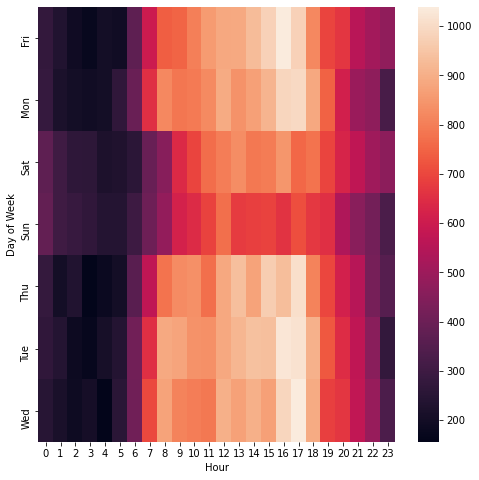

In [83]:
plt.figure(figsize=(8,8))
sns.heatmap(byHour)

** Agora crie um clustermap usando este DataFrame. **

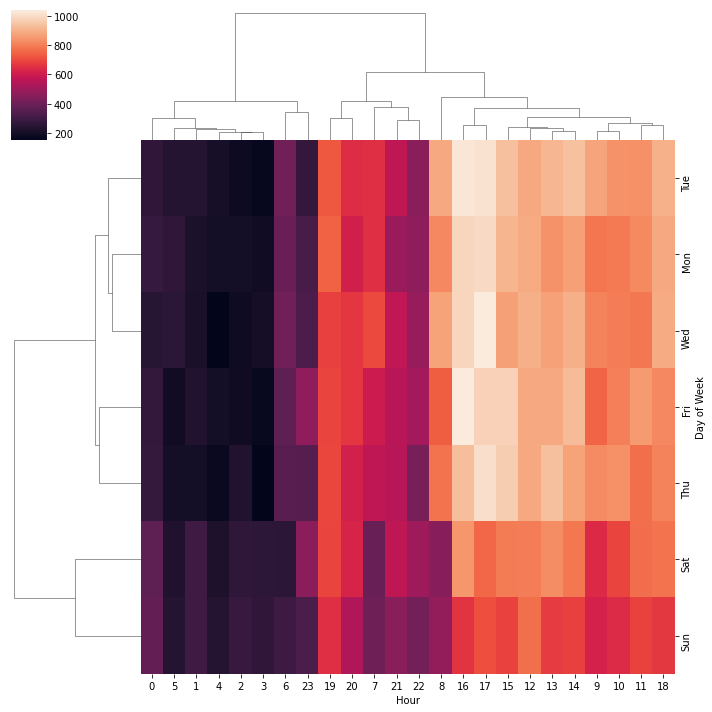

In [84]:
sns.clustermap(byHour)

** Agora repita estes mesmos plots e operações para um DataFrame que mostra o mês como a coluna. **

In [85]:
byHonth2 = df.groupby(['Day of Week','Month']).count()['twp'].unstack()
byHonth2

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


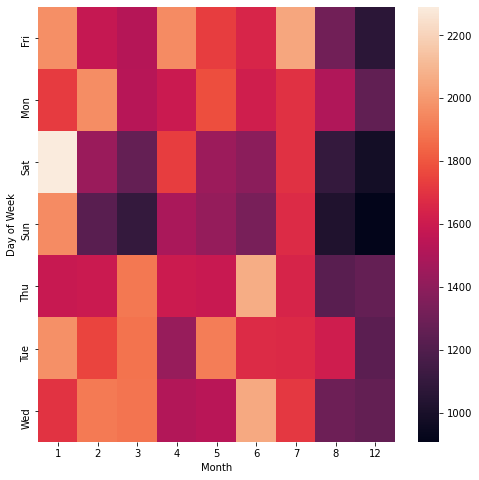

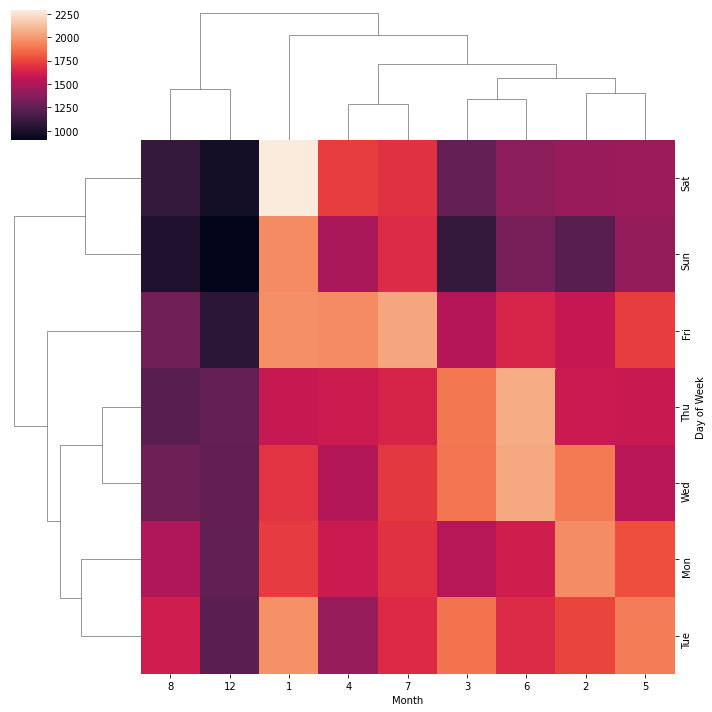

In [87]:
plt.figure(figsize=(8,8))
sns.heatmap(byHonth2)
sns.clustermap(byHonth2)